In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [12]:
df = pd.read_csv('university_data1.csv')

In [13]:
df.describe

<bound method NDFrame.describe of      GRE Score  GPA  IELTS Score  Research Paper  University Ranking  \
0           45  1.6          4.9              20                  48   
1          326  0.4          8.3              71                  66   
2           25  3.6          5.4              50                  68   
3          311  2.4          1.7              17                   2   
4          243  2.9          2.5              66                  99   
..         ...  ...          ...             ...                 ...   
995         65  2.7          6.6              30                  64   
996        159  3.6          4.4              51                  47   
997         15  1.3          2.7              33                  35   
998         70  1.9          2.4              10                  98   
999        241  3.4          1.6              88                  35   

                        University Name  Admit Probability  
0                   McMaster University 

## Data Preprocessing and Model Training 

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Assuming your dataset is stored in a CSV file named 'university_data.csv'
# Replace 'university_data.csv' with the actual file path if needed
df = pd.read_csv('university_data1.csv')

# Data Preprocessing
# Split data into features (X) and target variable (y)
X = df.drop(['University Name', 'Admit Probability'], axis=1)
y_actual = df['University Name']

# Convert to binary classification based on a threshold (e.g., 0.8)
threshold = 0.8
y_binary = (df['Admit Probability'] >= threshold).astype(int)

# Define numerical and categorical features
numerical_features = ['GRE Score', 'GPA', 'IELTS Score', 'University Ranking']
categorical_features = []  # Since 'Research Experience' is dropped

# Create transformers for numerical and categorical features
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first', sparse=False)

# Create a column transformer to apply different transformers to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test_actual, y_train_binary, y_test_binary = train_test_split(
    X, y_actual, y_binary, test_size=0.2, random_state=42
)

# Create a pipeline with RandomForestClassifier
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))  # Adjust parameters as needed
])

# Create a pipeline with XGBoost
xgb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(random_state=42))  # Adjust parameters as needed
])

# Create a pipeline with CatBoost
catboost_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', CatBoostClassifier(random_state=42, verbose=0))  # Adjust parameters as needed
])

# Train and evaluate RandomForestClassifier
rf_pipeline.fit(X_train, y_train_binary)
y_pred_rf = rf_pipeline.predict(X_test)
accuracy_rf = accuracy_score(y_test_binary, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test_binary, y_pred_rf)

print("RandomForestClassifier:")
print(f'Accuracy: {accuracy_rf}')
print('Confusion Matrix:')
print(conf_matrix_rf)

# Train and evaluate XGBoost
xgb_pipeline.fit(X_train, y_train_binary)
y_pred_xgb = xgb_pipeline.predict(X_test)
accuracy_xgb = accuracy_score(y_test_binary, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test_binary, y_pred_xgb)

print("\nXGBoost:")
print(f'Accuracy: {accuracy_xgb}')
print('Confusion Matrix:')
print(conf_matrix_xgb)

# Train and evaluate CatBoost
catboost_pipeline.fit(X_train, y_train_binary)
y_pred_catboost = catboost_pipeline.predict(X_test)
accuracy_catboost = accuracy_score(y_test_binary, y_pred_catboost)
conf_matrix_catboost = confusion_matrix(y_test_binary, y_pred_catboost)

print("\nCatBoost:")
print(f'Accuracy: {accuracy_catboost}')
print('Confusion Matrix:')
print(conf_matrix_catboost)


RandomForestClassifier:
Accuracy: 0.8
Confusion Matrix:
[[158   8]
 [ 32   2]]

XGBoost:
Accuracy: 0.77
Confusion Matrix:
[[147  19]
 [ 27   7]]

CatBoost:
Accuracy: 0.83
Confusion Matrix:
[[164   2]
 [ 32   2]]


In [15]:
df.head()

,GRE Score,GPA,IELTS Score,Research Paper,University Ranking,University Name,Admit Probability
0,45,1.6,4.9,20,48,McMaster University,0.28
1,326,0.4,8.3,71,66,University of Western Ontario,0.97
2,25,3.6,5.4,50,68,Thompson Rivers University,0.37
3,311,2.4,1.7,17,2,University of New Brunswick,0.40
4,243,2.9,2.5,66,99,University of Calgary,0.40


## data Visualisation and exploration 

D:\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
D:\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
D:\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. 

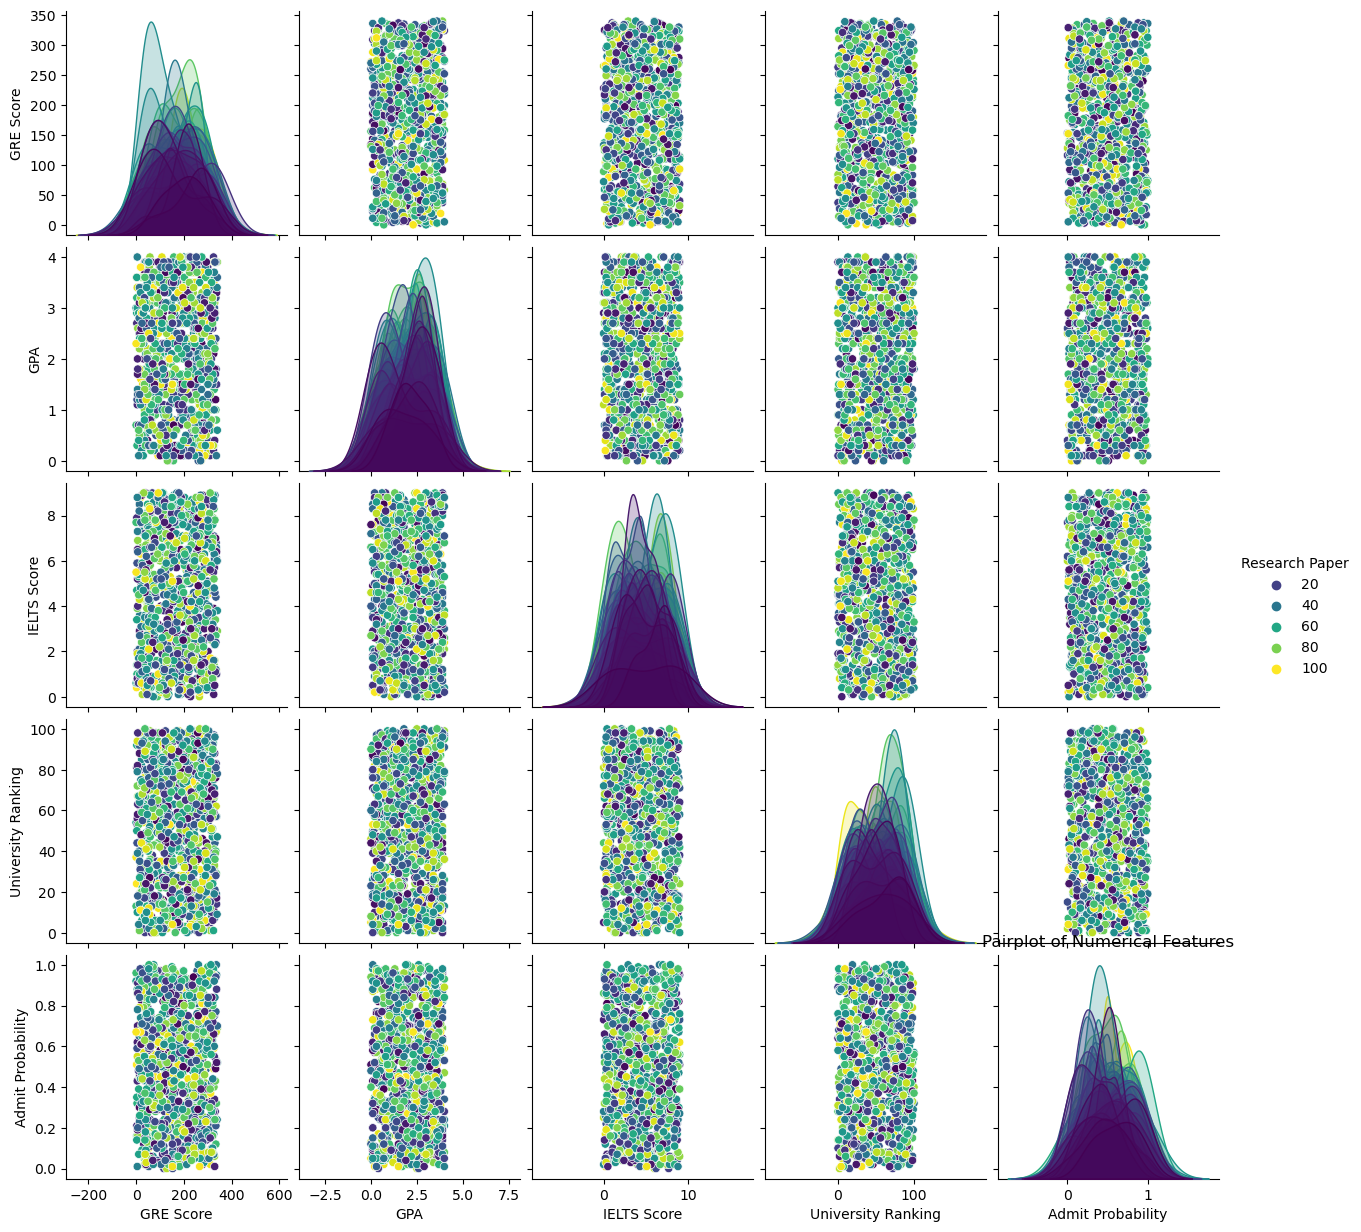

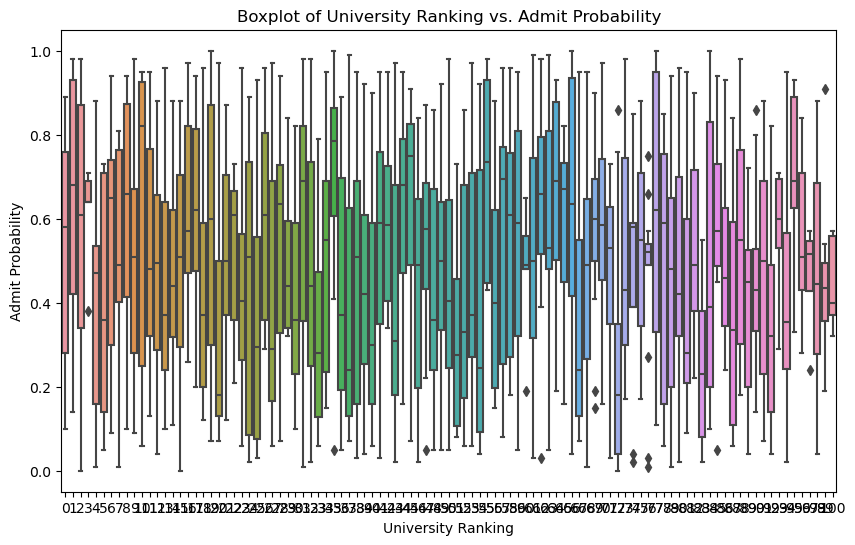

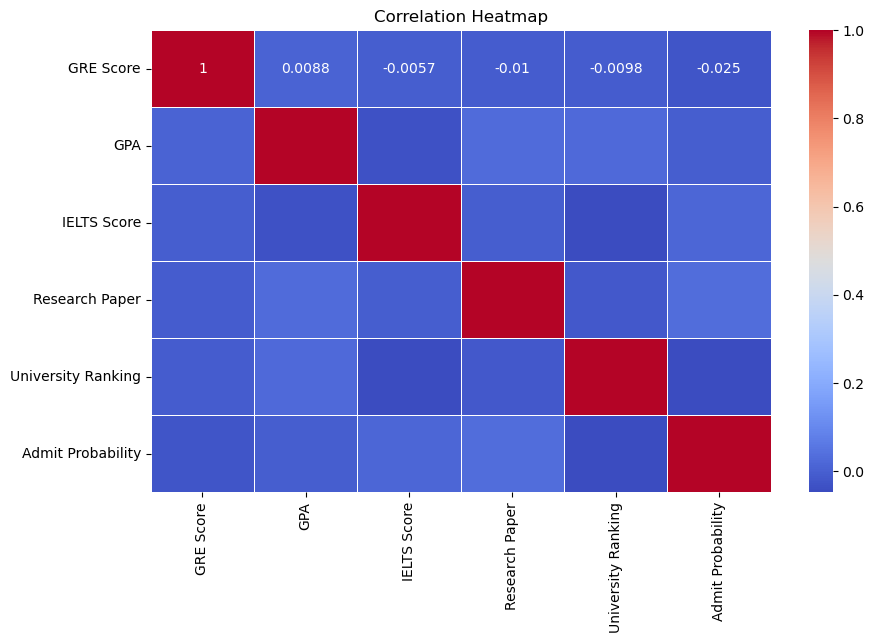

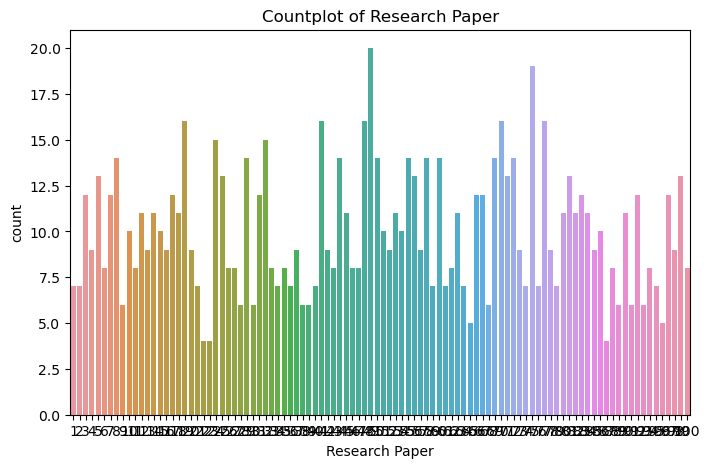

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataset is stored in a CSV file named 'university_data.csv'
# Replace 'university_data.csv' with the actual file path if needed
df = pd.read_csv('university_data1.csv')

# Data Exploration and Visualization

# Exclude non-numeric columns before creating the correlation heatmap
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_df = df[numeric_columns]

# Pairplot for numerical features
sns.pairplot(df, hue='Research Paper', palette='viridis')
plt.title('Pairplot of Numerical Features')
plt.show()

# Boxplot for University Ranking
plt.figure(figsize=(10, 6))
sns.boxplot(x='University Ranking', y='Admit Probability', data=df)
plt.title('Boxplot of University Ranking vs. Admit Probability')
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_df.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

# Countplot for Research Experience
plt.figure(figsize=(8, 5))
sns.countplot(x='Research Paper', data=df)
plt.title('Countplot of Research Paper')
plt.show()


In [16]:
import pickle

# Assuming 'pipeline' is your trained model
with open('trained_canada_model.pkl', 'wb') as model_file:
    pickle.dump(Pipeline, model_file)